# Generating a neural network that predicts cravings

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

So, Hamed, you have decided to look at my model! If you are reading this it is probably because I have not figured out how to upload it to the net. However, I can see that you are a man of science, and are willing to dive into the machine. Keep scrolling and you will see how this program unfolds.

We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

In [4]:
home_path = os.getcwd()

In [5]:
path = os.path.join(home_path,'jpegs'); path = Path(path)

In [6]:
len(path.ls())

366

This is the total number of images we have in our dataset. A very small number, we couldn't possibly train a neural network to predict which images will cause cravings and which will not...right?

In [7]:
path_img = path

In [8]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/ubuntu/Cravings_net/jpegs/Meth15.jpg'),
 PosixPath('/home/ubuntu/Cravings_net/jpegs/Neutral111.jpg'),
 PosixPath('/home/ubuntu/Cravings_net/jpegs/Neutral81.jpg'),
 PosixPath('/home/ubuntu/Cravings_net/jpegs/Meth10.jpg'),
 PosixPath('/home/ubuntu/Cravings_net/jpegs/Opioid56.jpg')]

It looks like all our files are ready to go.

In [9]:
np.random.seed(2)
def get_labels(file_path):
    if 'Neutral' in str(file_path):
        return 'Neutral'
    else:
        return 'Craving'

In [11]:
bs=64

Let's try to separate them into two classes. Images from the neutral set in one class and images from the drug set in the other classes. I'm making an assumption here that all neutral images do not cause cravings and all drug images do.

In [12]:
data = ImageDataBunch.from_name_func(path_img, fnames, label_func=get_labels, ds_tfms=get_transforms(), size=224, bs=bs
                                  )

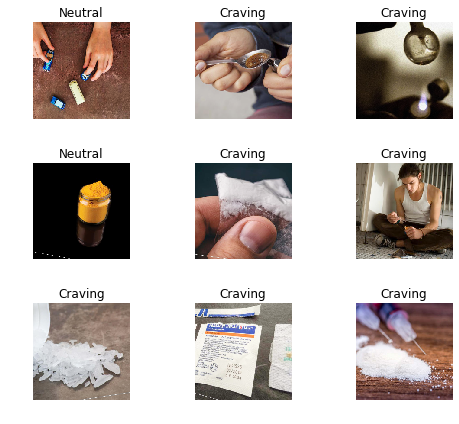

In [11]:
data.show_batch(rows=3, figsize=(7,6))

Yes...all the data organized. By my slave supercomputer on the amazon cloud. Thanks Alexa.

In [12]:
print(data.classes)
len(data.classes),data.c

['Craving', 'Neutral']


(2, 2)

Ah, so our classes are defined.

## Training: resnet50

Now we will train with resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers). 50 layers, 25 million parameters we can adjust to zero in on what makes people want to do drugs.

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along I reduce the batch size a bit since otherwise this larger network will require more GPU memory. Unless you want to give me a grant Hamed, I have to play within the space I can afford.

In [ ]:
data = ImageDataBunch.from_name_func(path_img, fnames, label_func=get_labels, ds_tfms=get_transforms(),
                                     size=229,bs=bs//4).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


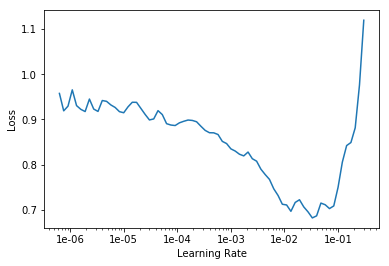

In [37]:
learn.lr_find()
learn.recorder.plot()

I do some tricks to get more accuracy. Genius stuff, you would love it.

In [38]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.744352,0.394025,0.138889,00:09
1,0.599882,0.684417,0.236111,00:07
2,0.467622,0.548101,0.152778,00:07
3,0.361952,0.300052,0.138889,00:07
4,0.291447,0.268230,0.125000,00:07
5,0.226085,0.331074,0.138889,00:07
6,0.182067,0.306608,0.138889,00:07
7,0.154945,0.313180,0.138889,00:07


Training my model... Yeessssss....Look at the error_rate. Dropping dropping....

In [77]:
learn.save('stage-2-neutralvcravings')

It's astonishing that it's possible to recognize drug craving images so accurately!

In [44]:
interp = ClassificationInterpretation.from_learner(learn)

This will help us see how good the model is. First, where did it get it wrong. Hmmm...tools, rocks, spanners. Yeah.

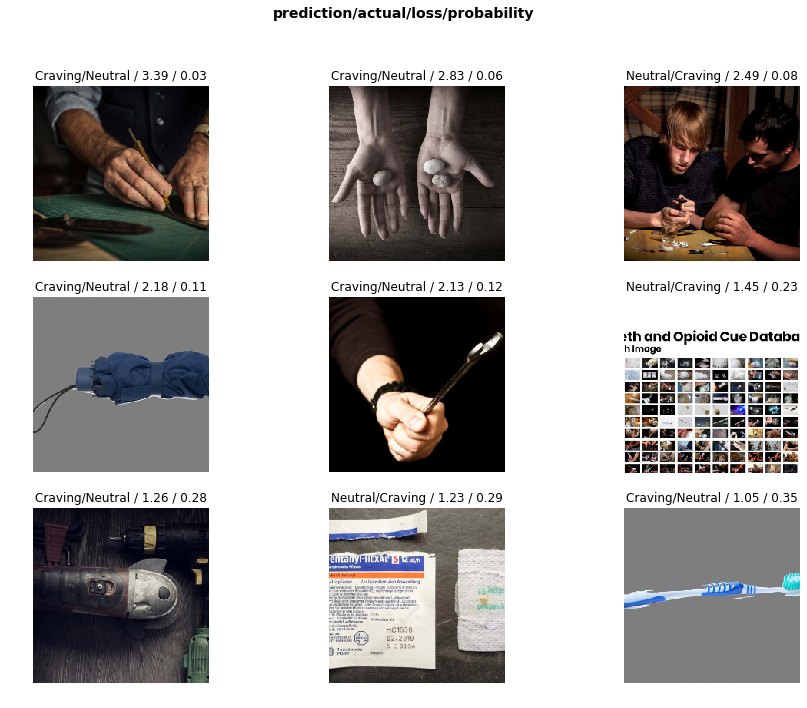

In [46]:
interp.plot_top_losses(9, figsize=(15,11),heatmap=False)

Ah... here is the gold. A confusion matrix showing where the model was strong. It looks like the model is much more likely to classify the cravings correctly than the neutral image. Great! You can never be too careful. I wonder what Saffron would do.

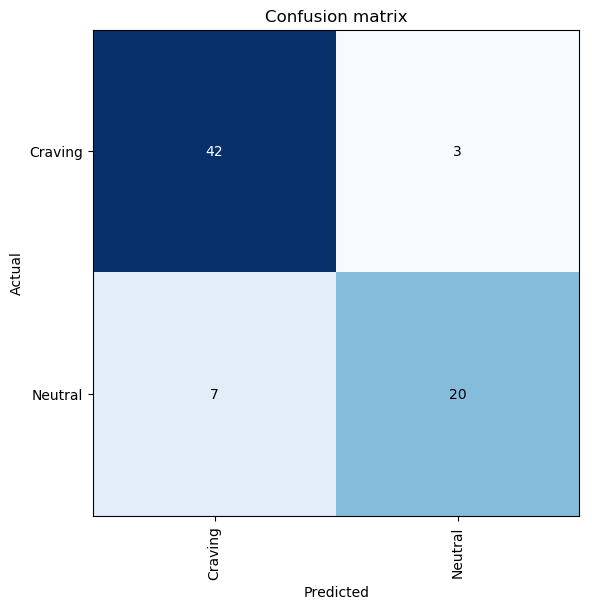

In [47]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=100)

In [59]:
learn.validate(learn.data.train_dl)

[0.039219018, tensor(0.0104)]

In [56]:
preds = learn.get_preds()

tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [61]:
learn.path

PosixPath('/home/ubuntu/Cravings_net/jpegs')

In [60]:
learn.export('Cravings_predictor.pkl')

In [85]:
path

PosixPath('/home/ubuntu/Cravings_net/jpegs')

In [ ]:
homepath = path.parents[0]

In [ ]:
testdir = homepath / 'Test'

In [91]:
get_image_files(testdir)

[PosixPath('/home/ubuntu/Cravings_net/Test/Neutral2saffron.jpg'),
 PosixPath('/home/ubuntu/Cravings_net/Test/Neutral3saffron.jpg'),
 PosixPath('/home/ubuntu/Cravings_net/Test/Amphetamine.jpg'),
 PosixPath('/home/ubuntu/Cravings_net/Test/amphetamine-powder.jpg'),
 PosixPath('/home/ubuntu/Cravings_net/Test/Neutral1saffron.jpg'),
 PosixPath('/home/ubuntu/Cravings_net/Test/amphetamine.jpg')]

In [125]:
funny_data = ImageList.from_folder(testdir)

In [126]:
funny_data

ImageList (6 items)
Image (3, 1001, 1500),Image (3, 1500, 1500),Image (3, 334, 500),Image (3, 350, 365),Image (3, 1254, 1672)
Path: /home/ubuntu/Cravings_net/Test

In [127]:
data.add_test(funny_data)

In [132]:
predictions, *_ = learn.get_preds(DatasetType.Test)

In [133]:
labels = np.argmax(predictions, 1)

In [134]:
labels

tensor([1, 1, 1, 0, 1, 0])

In [141]:
learn.show_results(DatasetType.Test,5)

IndexError: index 6 is out of bounds for dimension 0 with size 6